# Day 2 特徵工程
* 建議可以先「變更執行階段類型」為「TPU」或「GPU」，利於後段機器學習模型訓練

## 套件

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

## 一、資料集
* 請上傳你的資料集並更改為你的檔名

In [2]:
df = pd.read_excel('OUTPUT.xlsx')
df

,ID,name,smiles,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,1,ABACAVIRSULFATE,Nc1nc(NC2CC2)c3ncn(C4CC(CO)C=C4)c3n1,0,0,-1.8653,3.479344,47.8891,44.044274,9,...,0.862046,0.116831,0.560654,0.379450,0.268039,20.706840,52.049186,91.644726,0.793068,1.208143
1,2,ACARBOSE,CC1OC(OC2C(O)C(O)C(OC3C(O)C(O)C(O)OC3CO)OC2CO)...,0,0,-7.2263,52.219412,137.7680,88.208099,0,...,0.883822,0.065994,0.572409,0.487711,0.434117,42.761478,193.812432,465.446927,0.825733,1.494237
2,3,ACEBUTOLOL,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(=O)C,0,0,-2.1004,4.411680,67.0727,55.758204,6,...,0.910758,0.057143,0.494202,0.319559,0.386393,29.370226,71.693573,143.387359,0.866137,1.200154
3,4,ACECAINIDE,CCN(CC)CCNC(=O)c1ccc(NC(=O)C)cc1,0,0,-0.5179,0.268220,52.6108,46.640239,6,...,0.908190,0.048952,0.533958,0.387559,0.470449,24.128665,49.765298,100.659835,0.862285,1.391967
4,5,ACECLOFENAC,OC(=O)COC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl,0,1,0.5703,0.325242,37.1534,45.496309,12,...,0.629985,0.333300,0.474489,0.401925,0.374420,15.580870,59.559927,104.301091,0.444977,1.250833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,936,ZONISAMIDE,c1ccc2c(c1)c(no2)CS(=O)(=O)N,1,0,-0.9977,0.995405,88.4810,74.525376,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,937,ZOPICLONE,CN1CCN(CC1)C(=O)OC2c3c(nccn3)C(=O)N2c4ccc(cn4)Cl,1,0,-0.9977,0.995405,88.4810,74.525376,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,938,ZOTEPINE,CN(C)CCOC1=Cc2ccccc2Sc3c1cc(cc3)Cl,1,0,-0.9977,0.995405,88.4810,74.525376,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,939,ZOTEPINE,CN(C)CCOC1=Cc2cc(ccc2Sc3c1cccc3)Cl,1,0,-0.9977,0.995405,88.4810,74.525376,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 刪除欄位

In [3]:
df = df.drop(columns=['ID', 'name', 'smiles'])
df

,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,0,-1.8653,3.479344,47.8891,44.044274,9,10,39,21,...,0.862046,0.116831,0.560654,0.379450,0.268039,20.706840,52.049186,91.644726,0.793068,1.208143
1,0,0,-7.2263,52.219412,137.7680,88.208099,0,0,87,44,...,0.883822,0.065994,0.572409,0.487711,0.434117,42.761478,193.812432,465.446927,0.825733,1.494237
2,0,0,-2.1004,4.411680,67.0727,55.758204,6,6,52,24,...,0.910758,0.057143,0.494202,0.319559,0.386393,29.370226,71.693573,143.387359,0.866137,1.200154
3,0,0,-0.5179,0.268220,52.6108,46.640239,6,6,43,20,...,0.908190,0.048952,0.533958,0.387559,0.470449,24.128665,49.765298,100.659835,0.862285,1.391967
4,0,1,0.5703,0.325242,37.1534,45.496309,12,12,36,23,...,0.629985,0.333300,0.474489,0.401925,0.374420,15.580870,59.559927,104.301091,0.444977,1.250833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1,0,-0.9977,0.995405,88.4810,74.525376,11,11,66,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,1,0,-0.9977,0.995405,88.4810,74.525376,11,11,66,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,1,0,-0.9977,0.995405,88.4810,74.525376,11,11,66,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,1,0,-0.9977,0.995405,88.4810,74.525376,11,11,66,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 填補資料/刪除資料
* 請同學直接使用上週填補資料的結果
* 本範例直接刪除空值的資料（浪費！）

In [4]:
df = df.dropna()
df.describe()

,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
count,734.000000,734.000000,734.000000,7.340000e+02,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,...,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,0.362398,0.232970,-0.546345,2.287263e+00,49.447704,47.392145,8.054496,8.297003,41.178474,21.719346,...,0.702627,0.218700,0.539130,0.440790,0.392853,16.020170,55.189468,118.044112,0.577036,1.372773
std,0.481021,0.585363,1.411199,5.986129e+00,25.558618,16.620156,5.069748,5.322255,15.452679,7.107265,...,0.180977,0.094124,0.369979,0.074599,0.239596,9.385853,47.769028,124.197258,0.248544,0.581040
min,0.000000,0.000000,-9.309100,4.900000e-07,7.219300,8.231172,0.000000,0.000000,9.000000,4.000000,...,-3.013569,-0.210215,0.358231,0.009991,0.077354,-2.422319,-72.221189,-83.777196,0.130583,0.953762
25%,0.000000,0.000000,-1.373350,1.892061e-01,33.365450,35.851016,6.000000,6.000000,31.000000,17.000000,...,0.622469,0.147063,0.484164,0.386366,0.337687,11.443047,29.228773,55.013384,0.444995,1.261223
50%,0.000000,0.000000,-0.499250,8.149663e-01,45.039150,47.141256,6.000000,6.000000,40.000000,22.000000,...,0.718708,0.207470,0.521801,0.444935,0.389592,14.390496,45.296047,92.071170,0.579346,1.345641
75%,1.000000,0.000000,0.298575,2.343048e+00,59.713300,57.441902,12.000000,12.000000,50.000000,26.000000,...,0.791495,0.286961,0.562239,0.492481,0.433775,18.413714,67.576389,142.422262,0.688354,1.419913
max,1.000000,4.000000,5.546300,8.665934e+01,207.953800,133.058717,24.000000,25.000000,127.000000,58.000000,...,1.635949,0.456552,10.124937,0.839105,5.436597,178.093767,551.567752,1634.182056,5.599021,15.571526


In [6]:
df
#940 - 734 = 206 rows with nan

,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,0,-1.8653,3.479344,47.8891,44.044274,9,10,39,21,...,0.862046,0.116831,0.560654,0.379450,0.268039,20.706840,52.049186,91.644726,0.793068,1.208143
1,0,0,-7.2263,52.219412,137.7680,88.208099,0,0,87,44,...,0.883822,0.065994,0.572409,0.487711,0.434117,42.761478,193.812432,465.446927,0.825733,1.494237
2,0,0,-2.1004,4.411680,67.0727,55.758204,6,6,52,24,...,0.910758,0.057143,0.494202,0.319559,0.386393,29.370226,71.693573,143.387359,0.866137,1.200154
3,0,0,-0.5179,0.268220,52.6108,46.640239,6,6,43,20,...,0.908190,0.048952,0.533958,0.387559,0.470449,24.128665,49.765298,100.659835,0.862285,1.391967
4,0,1,0.5703,0.325242,37.1534,45.496309,12,12,36,23,...,0.629985,0.333300,0.474489,0.401925,0.374420,15.580870,59.559927,104.301091,0.444977,1.250833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0,1,0.1067,0.011385,104.1515,72.119720,0,0,68,28,...,0.720530,0.181543,0.509733,0.538019,0.459069,16.698107,61.103320,137.441105,0.580795,1.506820
913,0,0,-1.1304,1.277804,62.4210,46.023860,5,5,43,23,...,0.877738,0.085032,0.658113,0.333239,0.371575,26.968704,80.352883,161.824038,0.816608,1.362927
914,0,0,-1.6411,2.693209,68.3835,49.919446,5,5,47,25,...,0.849779,0.106366,0.600512,0.415321,0.404236,25.471279,85.847108,176.825090,0.774668,1.420069
915,1,1,-0.3467,0.120201,37.3651,26.352688,0,0,26,10,...,0.785435,0.140859,0.484922,0.452231,0.396901,8.345802,12.461435,25.547480,0.678153,1.334054


#本範例以下步驟變更前請在此重置變數
* df 原始資料
* data 特徵改變後的資料（隨步驟變化）
    * 只有特徵，沒有標註(output)
* selected_features 目前的特徵（特徵選擇後會減少）

In [26]:
data = df
data = data.drop(columns=['output'])
selected_features = data.columns

## 二、特徵縮放
* 建議使用特徵縮放的方法
    * 基於距離的演算法：例如kNN、k-Means clustering、SVM、PCA等
* 以下兩種方法擇一即可

### 2.1 標準化 Standardization (Z-score Normalization)
#### 將特徵轉為常態分佈的z值（M=0, SD=1）
* 適合用於
    * 假設資料為常態分佈的演算法：例如線性回歸
    * 假設資料中心為０的演算法：例如PCA

In [27]:
#標準化 Standardization (Z-score Normalization)
scaler = StandardScaler()
data = scaler.fit_transform(data)

pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640
count,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,...,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02,7.340000e+02
mean,-4.840209e-17,1.936084e-17,1.694073e-17,5.324230e-17,-9.196398e-17,1.452063e-16,1.669872e-16,1.839280e-16,-1.161650e-16,1.936084e-17,...,4.210982e-16,-6.050262e-17,6.050262e-17,4.525596e-16,1.500465e-16,-3.388147e-16,1.161650e-16,8.712377e-17,2.323300e-16,3.436549e-16
std,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,...,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00,1.000682e+00
min,-3.982640e-01,-6.213672e+00,-3.823543e-01,-1.653344e+00,-2.357840e+00,-1.589820e+00,-1.559989e+00,-2.083808e+00,-2.494832e+00,-2.105947e+00,...,-2.054808e+01,-4.560026e+00,-4.892776e-01,-5.778769e+00,-1.317698e+00,-1.966264e+00,-2.669042e+00,-1.626114e+00,-1.797495e+00,-7.216328e-01
25%,-3.982640e-01,-5.864295e-01,-3.507254e-01,-6.296593e-01,-6.948791e-01,-4.055225e-01,-4.318788e-01,-6.591358e-01,-6.644700e-01,-6.990336e-01,...,-4.432211e-01,-7.616061e-01,-1.486673e-01,-7.300471e-01,-2.304028e-01,-4.879944e-01,-5.438335e-01,-5.078511e-01,-5.316205e-01,-1.921157e-01
50%,-3.982640e-01,3.339505e-02,-2.461191e-01,-1.726056e-01,-1.510573e-02,-4.055225e-01,-4.318788e-01,-7.631542e-02,3.951525e-02,-4.968874e-02,...,8.891999e-02,-1.193914e-01,-4.687054e-02,5.560843e-02,-1.362144e-02,-1.737493e-01,-2.072508e-01,-2.092691e-01,9.303369e-03,-4.672847e-02
75%,-3.982640e-01,5.991330e-01,9.325428e-03,4.019230e-01,6.050852e-01,7.787753e-01,6.962316e-01,5.712628e-01,6.027034e-01,5.996561e-01,...,4.913827e-01,7.257268e-01,6.250320e-02,6.933900e-01,1.709111e-01,2.551900e-01,2.594854e-01,1.964196e-01,4.481875e-01,8.118514e-02
max,6.439765e+00,4.320296e+00,1.410421e+01,6.205898e+00,5.157893e+00,3.147371e+00,3.140471e+00,5.557615e+00,5.108209e+00,5.686191e+00,...,5.160644e+00,2.528740e+00,2.592672e+01,5.343040e+00,2.106540e+01,1.727964e+01,1.039830e+01,1.221582e+01,2.021937e+01,2.445348e+01


### 2.2 最大最小縮放 Min-Max Scaling
#### 將特徵縮放到 [0, 1] 之間
* 適合用於不限制常態分佈的演算法

In [ ]:
#最大最小縮放 Min-Max Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.057590,0.590330,0.026539,0.209865,0.313189,0.335885,0.332250,0.272281,0.327539,0.270029,...,0.799816,0.641071,0.018550,0.518058,0.059204,0.102528,0.204313,0.117565,0.082084,0.029282
std,0.145243,0.095470,0.068672,0.126740,0.132952,0.211702,0.213414,0.130675,0.131154,0.128442,...,0.038648,0.140166,0.037434,0.088983,0.044122,0.052054,0.076476,0.072020,0.045280,0.039231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.534395,0.002213,0.130223,0.221468,0.250000,0.240000,0.186441,0.240741,0.180556,...,0.782474,0.532785,0.012969,0.453262,0.048829,0.076970,0.162324,0.080451,0.057511,0.021827
50%,0.000000,0.593044,0.009466,0.188315,0.311575,0.250000,0.240000,0.262712,0.333333,0.263889,...,0.803734,0.623421,0.016689,0.519633,0.058565,0.093343,0.188525,0.102709,0.083250,0.027170
75%,0.000000,0.648034,0.026988,0.261385,0.393376,0.500000,0.480000,0.347458,0.407407,0.347222,...,0.819724,0.748132,0.020873,0.579435,0.066292,0.116021,0.224102,0.132006,0.103637,0.032495
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 三、特徵選擇

### 3.1 相關係數法

#### 假設：與標註低相關的特徵對模型可能幫助不大
* 本範例請設定適合的相關係數閾值 r_threshold
    * 提醒：重新執行前記得先重置變數才不會出錯
* 本範例使用pandas的相關係數計算，而非sklearn

#### 挑戰：相關係數閾值應該設定多少？

In [13]:
data = pd.DataFrame(data, columns=selected_features)
df_corr = pd.DataFrame({'Feature':selected_features, 'Coorelation':data.corrwith(df['output']).abs()})
df_corr.describe()

,Coorelation
count,1640.000000
mean,0.039449
std,0.026720
min,0.000008
25%,0.018790
50%,0.034222
75%,0.056910
max,0.126375


In [14]:
#相關分析（只看與output相關的部分）
correlations = data.corrwith(df['output'])

#特徵選擇
r_threshold = 0.018790  #請選擇適當的閾值: 25%
selected_features = correlations[correlations.abs() > r_threshold].index
data = df[selected_features]

print(selected_features)
pd.DataFrame({'Feature':selected_features, 'Coorelation':data.corrwith(df['output'])})

Index(['nAcid', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond', 'nAtom',
       'nHeavyAtom', 'nC', 'nN',
       ...
       'Di', 'L1s', 'L3s', 'P1s', 'P2s', 'E1s', 'Ts', 'As', 'Vs', 'Ds'],
      dtype='object', length=1230)


,Feature,Coorelation
nAcid,nAcid,-0.251803
ALogp2,ALogp2,-0.159188
AMR,AMR,-0.158833
apol,apol,-0.048985
naAromAtom,naAromAtom,0.118322
...,...,...
E1s,E1s,-0.074528
Ts,Ts,-0.158994
As,As,-0.128575
Vs,Vs,-0.123428


In [ ]:
X = data
Y = df['output']

### 3.2 決策樹法
#### 利用建立決策樹時的Gini不純度指標的總減少量代表特徵重要性
* 決策樹對於資料單位較不敏感，不一定需要特徵縮放

In [ ]:
#建立決策樹
tree = DecisionTreeClassifier()
tree.fit(X, Y)

importances = pd.DataFrame({'features':selected_features, 'importance':tree.feature_importances_}).sort_values('importance', ascending=False)
importances.head(10)

,features,importance
1410,TopoPSA,0.200301
903,minHBa,0.095009
613,ASP-0,0.067204
556,SpMax1_Bhs,0.045470
1539,WPSA-1,0.045222
788,SHBint4,0.032914
387,VE1_Dzm,0.031627
220,AATSC1e,0.028659
459,BCUTw-1l,0.028210
265,MATS3m,0.027866


In [ ]:
#從決策樹的信息熵來選擇
sfm = SelectFromModel(tree, threshold=.05)
data = sfm.fit_transform(data, df['output'])
data

array([[  0.68557032,   2.01151927, 101.88      ],
       [  0.74131985,   2.82332503, 321.17      ],
       [  0.75468832,   2.75685945,  87.66      ],
       ...,
       [  0.69713682,  -9.39194685,  69.08      ],
       [  0.70710678,   3.22222222,  24.06      ],
       [  0.74789096,   1.92625154,  40.62      ]])

### 3.3 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
rf_model = RandomForestClassifier()
rf_model.fit(X,y) #X:就是年亨老師的data y:output
print(rf_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### 3.4 DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
 
dt_model = DecisionTreeClassifier()
dt_model.fit(X,y)
 
print(dt_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### 3.5 ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## 四、特徵縮減


### 主成分分析 Principal Components Analysis (PCA)

In [15]:
#創建主成份分析
#請指定主成分個數（須小於特徵數量）
com_number = 20
pca = PCA(n_components=com_number)

pca_result = pca.fit_transform(data)
pca_result

array([[-4.48806907e+05, -7.91315087e+04,  1.23768196e+04, ...,
         1.33974270e+03, -1.10125490e+02,  4.94605248e+02],
       [-4.48022387e+05, -7.89949789e+04,  1.22472117e+04, ...,
         1.65180272e+03,  3.24446039e+03,  1.04458550e+03],
       [-4.48825951e+05, -7.91257584e+04,  1.22826199e+04, ...,
         9.42324490e+02, -5.37436776e+02, -8.37527432e+02],
       ...,
       [-4.48812726e+05, -7.90717610e+04,  1.23562244e+04, ...,
         6.35157956e+02, -1.38145515e+03,  2.80208612e+02],
       [ 1.18211098e+07,  4.13482165e+05, -2.47976119e+05, ...,
         1.01575262e+03, -6.52724213e+02,  1.54148412e+01],
       [-4.48263907e+05, -7.91371852e+04,  1.24278616e+04, ...,
         3.49331781e+02, -9.59319604e+02, -5.96452361e+01]])

In [16]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained variance ratio:", explained_variance)
print("Cumulative variance ratio:", cumulative_variance)


Explained variance ratio: [8.71547597e-01 1.01849895e-01 2.59755692e-02 3.34559714e-04
 1.65388300e-04 1.07069930e-04 6.50488404e-06 4.37438841e-06
 2.24498977e-06 1.89131366e-06 1.51535016e-06 9.44628691e-07
 7.82112951e-07 3.98055838e-07 2.10486097e-07 1.75412188e-07
 1.49055364e-07 1.20793515e-07 8.94321883e-08 6.83394781e-08]
Cumulative variance ratio: [0.8715476  0.97339749 0.99937306 0.99970762 0.99987301 0.99998008
 0.99998658 0.99999096 0.9999932  0.99999509 0.99999661 0.99999755
 0.99999834 0.99999873 0.99999895 0.99999912 0.99999927 0.99999939
 0.99999948 0.99999955]


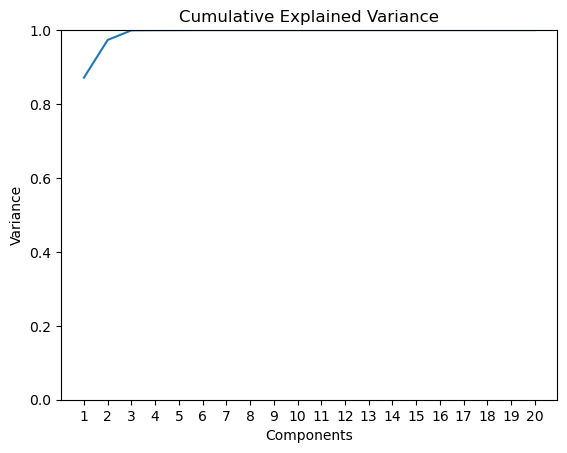

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(com_number), cumulative_variance)

plt.title('Cumulative Explained Variance')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.ylim(0, 1)
plt.xticks(range(com_number), range(1, com_number+1))
plt.show()

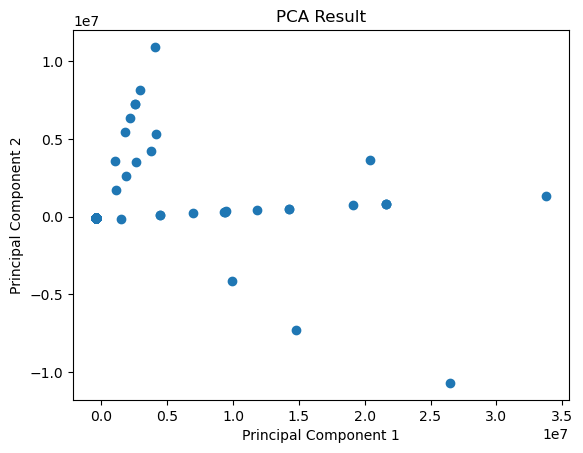

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

# 分類模型

## 支持向量機 Support Vector Machine (SVM)

In [32]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

### 使用原始資料

In [37]:
# 定義參數範圍
param_grid = {'C': [0.1, 1, 10, 50], 'gamma': [0.001, 0.05, 0.1, 1, 10, 50]}  

#分割訓練集與測試集：使用data（不降維）
x_train, x_test, y_train, y_test = train_test_split(data, df['output'], test_size=0.2, random_state=55)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)


# 創建SVM模型
svm_classifier = svm.SVC(kernel='rbf')

# 使用Grid Search來進行交叉驗證
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# 最佳的Gamma值和C值
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']
print(best_gamma, best_C)
# 使用最佳的Gamma值和C值創建最終的SVM模型
final_svm_classifier = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)
final_svm_classifier.fit(x_train, y_train)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)


資料量: (587, 1641) (147, 1641) 587 147
0.001 50
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        97
           1       0.85      0.78      0.81        50

    accuracy                           0.88       147
   macro avg       0.87      0.85      0.86       147
weighted avg       0.88      0.88      0.88       147



In [35]:
#分割訓練集與測試集：使用data（不降維）
x_train, x_test, y_train, y_test = train_test_split(data, df['output'], test_size=0.2, random_state=55)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)

#創建Support Vector Classifier
model = svm.SVC(kernel='rbf')

#模型訓練
model.fit(x_train, y_train)

#預測資料
y_pred = model.predict(x_test)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

資料量: (587, 1641) (147, 1641) 587 147
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        97
           1       0.85      0.78      0.81        50

    accuracy                           0.88       147
   macro avg       0.87      0.85      0.86       147
weighted avg       0.88      0.88      0.88       147



### 使用PCA

In [30]:
#分割訓練集與測試集：使用pca_result
x_train, x_test, y_train, y_test = train_test_split(pca_result, df['output'], test_size=0.2, random_state=42)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)

#創建Support Vector Classifier
model = svm.SVC(kernel='rbf')

#模型訓練
model.fit(x_train, y_train)

#預測資料
y_pred = model.predict(x_test)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

資料量: (587, 20) (147, 20) 587 147
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        92
           1       1.00      0.04      0.07        55

    accuracy                           0.64       147
   macro avg       0.82      0.52      0.42       147
weighted avg       0.77      0.64      0.51       147

